# Store Sales - Exploratory Data Analysis (EDA)

The notebook is intended to explore the Time Series contained in `data/store_sales`.

**NOTE:** Ensure to download also the `train.csv` from the following Kaggle Competition: [Stores Sales - Time Series Forecasting](https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data).

# Setup Notebook

## Imports

In [45]:
# Import Standard Libraries
from pathlib import Path
from dynaconf import Dynaconf
import os
import pandas as pd

# Import Package Modules
from src.exploratory_data_analysis.exploratory_data_analysis_utils import (
    plot_time_series,
    set_plot_characteristics
)

## Define Configurations

In [49]:
# Retrieve root path
root_path = Path(os.getcwd()).parents[1]

# Read EDA configuration
config = Dynaconf(settings_files=[root_path / 'configuration' / 'store_sales_config.toml'], environment=True, env='eda')

# Extract configurations
data_paths = config['data_paths']

## Set Plots Characteristics

In [47]:
set_plot_characteristics(config['plot_settings'])

[09/07/2024 16:00:32 - exploratory_data_analysis_utils] INFO - set_plot_characteristics - Start
[09/07/2024 16:00:32 - exploratory_data_analysis_utils] INFO - set_plot_characteristics - Creating theme parameters
[09/07/2024 16:00:32 - exploratory_data_analysis_utils] INFO - set_plot_characteristics - End


# Read Data

In [50]:
# Read data with parse dates
holidays_data = pd.read_csv(root_path / data_paths['holidays_data'], parse_dates=['date'], date_format='%Y-%m-%d')
oil_data = pd.read_csv(root_path / data_paths['oil_data'], parse_dates=['date'], date_format='%Y-%m-%d')
stores_data = pd.read_csv(root_path / data_paths['stores_data'])
transactions_data = pd.read_csv(root_path / data_paths['transactions_data'], parse_dates=['date'], date_format='%Y-%m-%d')
train_data = pd.read_csv(root_path / data_paths['train_data'], parse_dates=['date'], date_format='%Y-%m-%d')
test_data = pd.read_csv(root_path / data_paths['test_data'], parse_dates=['date'], date_format='%Y-%m-%d')

# Exploratory Data Analysis

## Time Series Plot

### Oil Data

[09/07/2024 16:01:50 - exploratory_data_analysis_utils] INFO - plot_time_series - Start
[09/07/2024 16:01:50 - exploratory_data_analysis_utils] INFO - plot_time_series - Plot time series
[09/07/2024 16:01:50 - exploratory_data_analysis_utils] INFO - plot_time_series - Set plot configurations
[09/07/2024 16:01:50 - exploratory_data_analysis_utils] INFO - plot_time_series - Calling the plt.show()


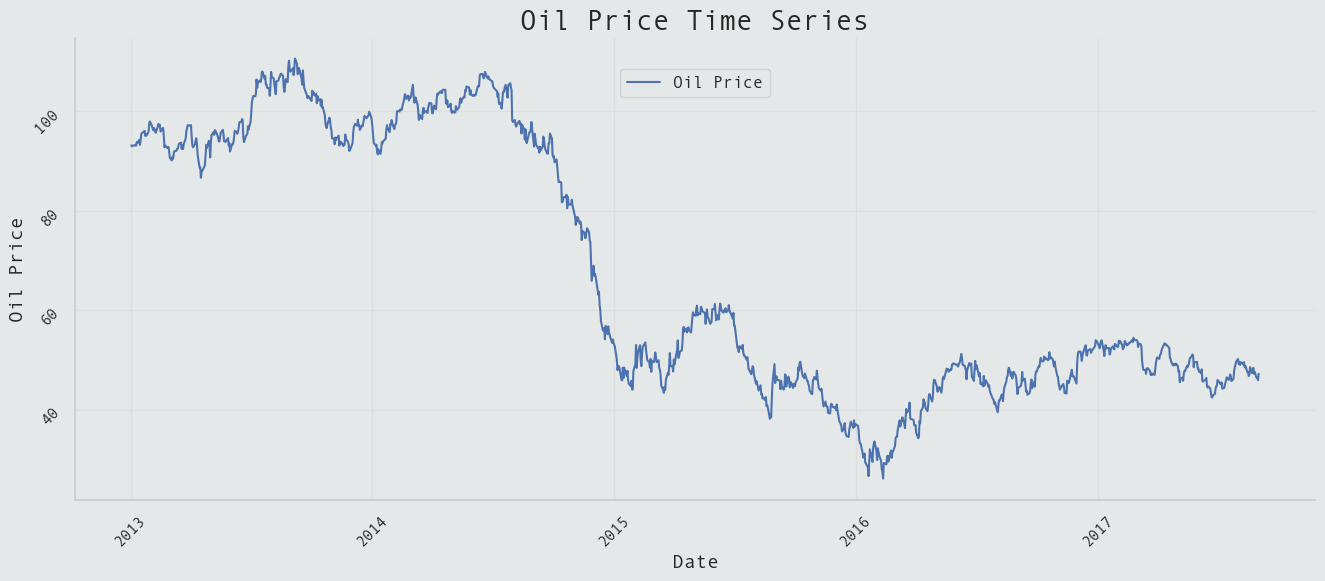

[09/07/2024 16:01:50 - exploratory_data_analysis_utils] INFO - plot_time_series - End


<Axes: title={'center': 'Oil Price Time Series'}, xlabel='Date', ylabel='Oil Price'>

<Figure size 1600x600 with 0 Axes>

In [51]:
plot_time_series(time_series=oil_data, 
                 columns=['date', 'dcoilwtico'], 
                 title='Oil Price Time Series', 
                 labels=['Date', 'Oil Price', 'Oil Price'], 
                 to_plot=True)